<a href="https://colab.research.google.com/github/BirukovAlex/neto_Python/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%8F%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%C2%AB%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D1%82%D0%BE%D1%87%D0%BD%D0%BE%D1%81%D1%82%D0%B8_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%2C_%D0%BF%D0%B5%D1%80%D0%B5%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5%2C_%D1%80%D0%B5%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F%C2%BB_%D0%BE%D0%B1%D0%BD%D0%BE%D0%B2%D0%BB%D0%B5%D0%BD%D0%BD%D0%BE%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


# **Описание задания:**
Решить задачу классификации при помощи обучения модели логистической регрессии. Целевая переменная — пол спортсмена. Качество модели оценивается путем подсчета метрик TPR, FPR и построения графиков ROC-кривой, Precision-Recall. Данные для обучения модели хранятся в файле athletes.csv, который можно найти в материалах к занятию.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


# 1.Преобразуйте данные:
a. проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости;

b. закодируйте категориальные переменные числовыми значениями по необходимости.

Видим, что в параметрах dob, height, weight есть пропуски. Строки с пропусками мы удалим, поскольку нет способа их заполнить

In [5]:
data = data[ pd.isnull( data['height'] ) == 0 ]
data = data[ pd.isnull( data['weight'] ) == 0 ]
data = data[ pd.isnull( data['dob'] ) == 0 ]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


Оставим в параметрах только 'height', 'weight', 'gold', 'silver', 'bronze'. Целевая переменная у нас 'sex'.

In [9]:
X = data[['height', 'weight', 'gold', 'silver', 'bronze']]

Заменим в целевой переменной male и female на 0 и 1

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data['sex'])
y = pd.Series(data = le.transform(data['sex']))

# 2.Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.

In [11]:
# делим выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
# строим модель
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# 3.Постройте ROC-кривую с помощью функции roc_curve из библиотеки sklearn.metrics

In [16]:
predictions = model.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, predictions[:,1])

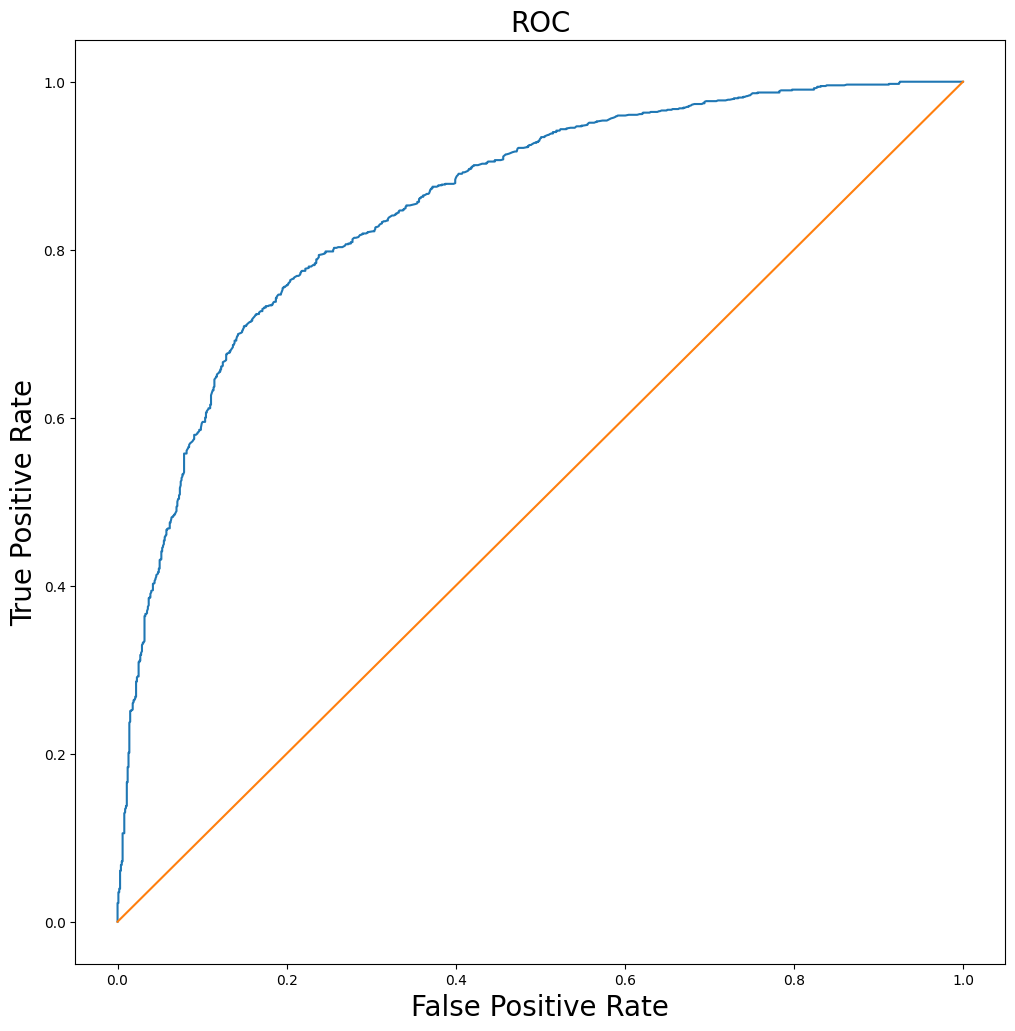

In [48]:
plt.figure(figsize=(12, 12))
plt.plot(fpr, tpr, label = 'Logreg')
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10),label = 'RedLine')
plt.title('ROC', fontdict={'fontsize': 20})
plt.xlabel('False Positive Rate', fontdict={'fontsize': 20})
plt.ylabel('True Positive Rate', fontdict={'fontsize': 20})
plt.show()

# 4. Вычислите значение ROC-AUC метрики с помощью функции roc_auc_score из библиотеки sklearn.metrics

In [37]:
roc_auc_score(y_test, predictions[:, 1]).round(2)

np.float64(0.85)

# 5.Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn

In [42]:
from numpy import arange
thresholds = arange(0, 1, 0.1)
#формируем данные
fprs = []
tprs = []
prs = []
res = []
pr_custom = []
for threshold in thresholds:
    tp = 0
    fp = 0
    fn = 0
    tn = 0
    for predicted_prob, actual in zip( predictions[:, 1], y_test ):
        if predicted_prob >= threshold:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    tpr2 = tp/(tp + fn)
    fpr2 = fp/(fp + tn)
    precision = tp/(tp + fp)
    recall = tpr2
    fprs.append(fpr2)
    tprs.append(tpr2)
    prs.append(precision) # сюда сохраняем для Precision-Recall
    res.append(recall) # сюда сохраняем для Precision-Recall

### 5.1. ROC-кривая. Объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.

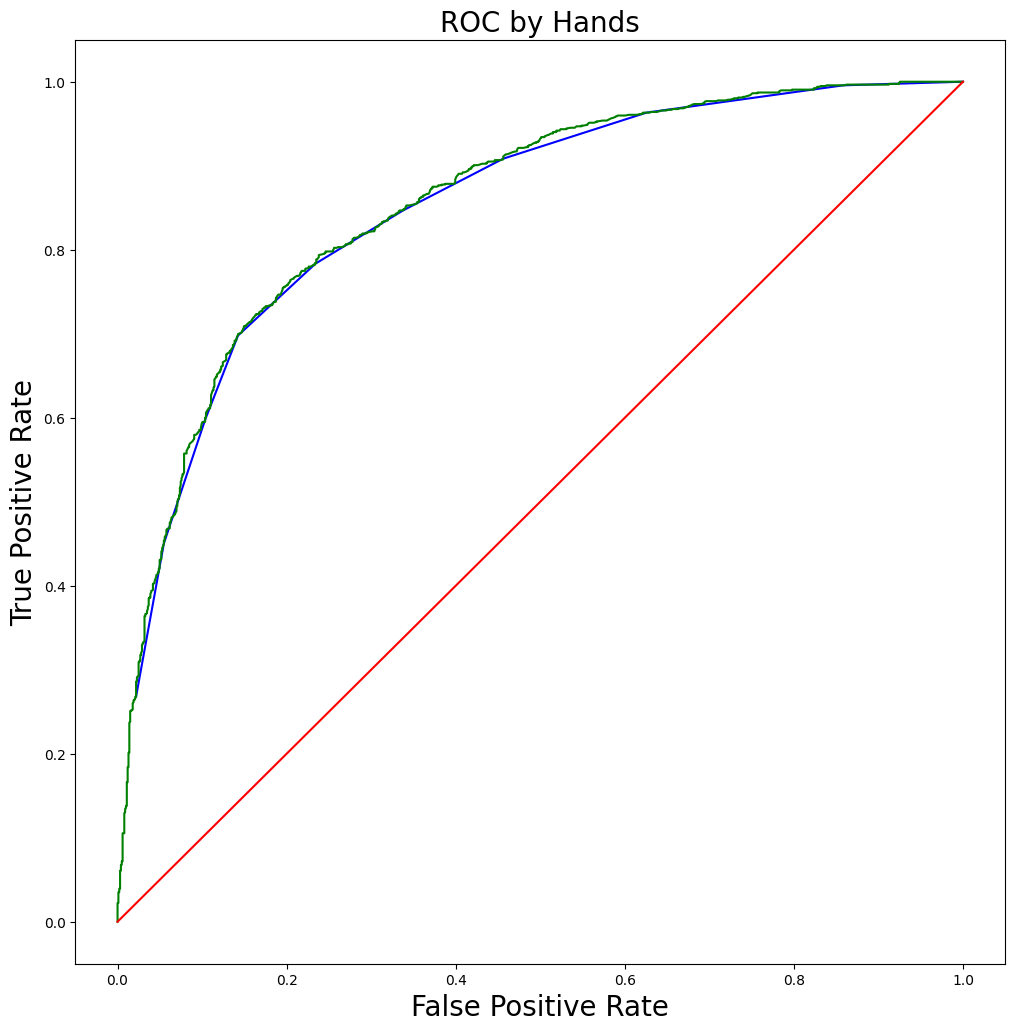

In [49]:
plt.figure(figsize=(12, 12))
plt.plot(fprs, tprs, color="blue")
plt.plot(fpr, tpr, color="green")
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10),label = 'RedLine', color="red")
plt.title('ROC by Hands', fontdict={'fontsize': 20})
plt.xlabel('False Positive Rate', fontdict={'fontsize': 20})
plt.ylabel('True Positive Rate', fontdict={'fontsize': 20})
plt.show()

### 5.2. График Precision-Recall

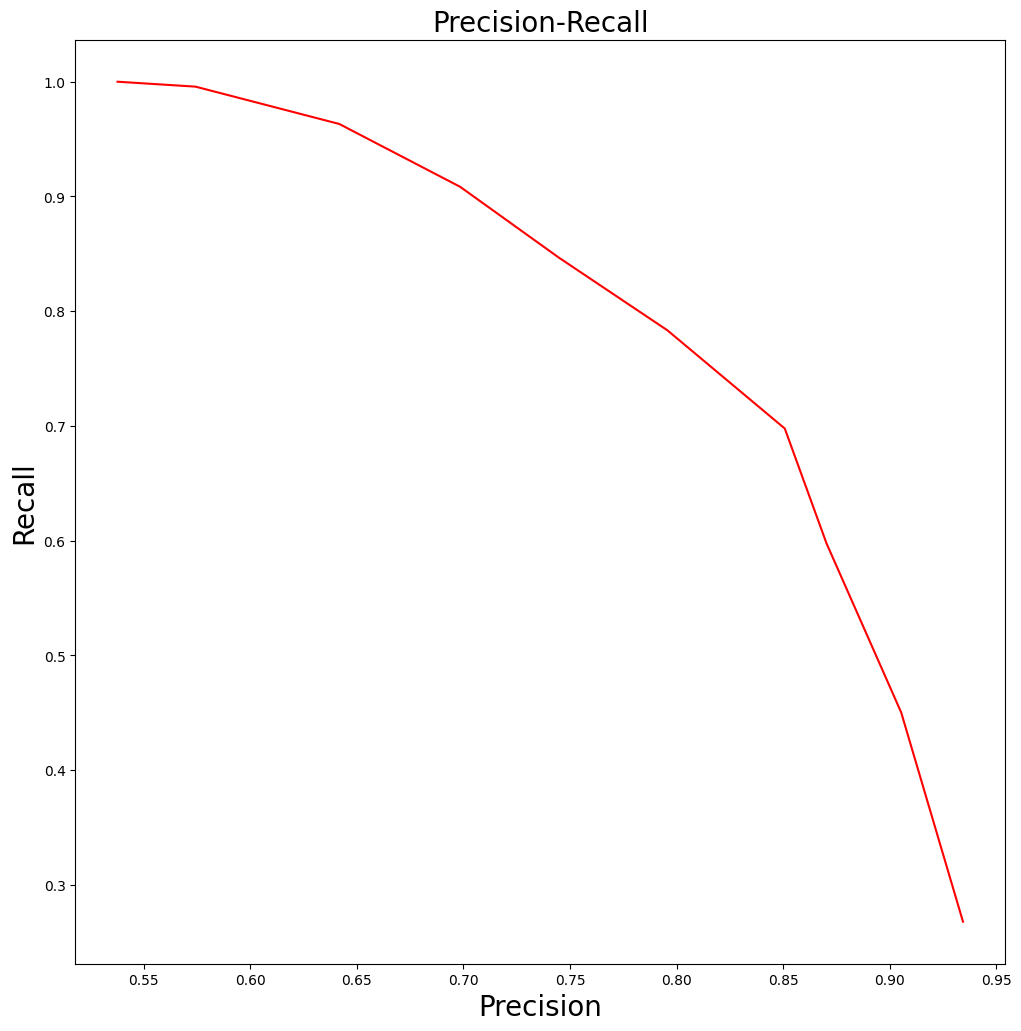

In [50]:
plt.figure(figsize=(12, 12))
plt.plot(prs, res, color="red")
plt.title('Precision-Recall', fontdict={'fontsize': 20})
plt.xlabel('Precision', fontdict={'fontsize': 20})
plt.ylabel('Recall', fontdict={'fontsize': 20})
plt.show()

### 5.4. ROC-AUC. Площадь

In [57]:
auc(fprs, tprs)

np.float64(0.8467030849205917)

In [58]:
auc(fpr, tpr)

np.float64(0.8543586783004967)

### Вывод
- форма ROC нормальная, стремится к квадрату, на достатчном удалении от красной линии (ниже диагонали проходить не может)
- ручной и библиотечный способы почти идентичны, графики практически сливаются, площади различаются незначительно

